<a href="https://colab.research.google.com/github/ElFosco/NLP_assignments/blob/main/Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1

**Due to**: 23/12/2021 (dd/mm/yyyy)

**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES.

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!

So, when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general description of the task you have addressed and how you have addressed it
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis

# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the general setting of the problem
* 1 point for the handling of OOV terms
* 1 point for the models
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

This distribution of scores is tentative and we may decide to alter it at any moment.
We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. Similarly, in case of grave errors, we may decide to assign an equivalent malus (-0.5 points).

# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1036039/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.

# Imports

In [1]:
import os, shutil  # file management
import sys  # system
import pandas as pd  # dataframe management
import numpy as np  # data manipulation
from tqdm import tqdm  # useful during debugging (progress bars)
from typing import List, Callable, Dict  # typing
import re  # regex
import urllib.request  # download files
import zipfile  # unzip files
import gensim  # embeddings
import gensim.downloader as gloader  # embeddings
from sklearn.preprocessing import LabelEncoder, OneHotEncoder  # one-hot encoding
from matplotlib import pyplot as plt  # Plots

# Models
import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Bidirectional, Dense, LSTM, TimeDistributed, GRU
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# F1
from sklearn.metrics import f1_score, accuracy_score
from functools import partial

# Grid search
from sklearn.model_selection import GridSearchCV
import copy

# Dataframe

Download the corpora and split it in training and test sets, structuring a dataframe.

## Download & Extraction

In [2]:
dataset_folder = os.path.join(os.getcwd(), "Datasets", "Original")

if not os.path.exists(dataset_folder):
    os.makedirs(dataset_folder)

url = 'https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip'

dataset_path = os.path.join(dataset_folder, "dependency_treebank.zip")

if not os.path.exists(dataset_path):
    urllib.request.urlretrieve(url, dataset_path)
    print("Successful download")

zip = zipfile.ZipFile(dataset_path)
zip.extractall(dataset_folder)
zip.close()
print("Successful extraction")

Successful download
Successful extraction


## Creation Dataframe and splitting

### [Regex](https://regex101.com/)

In [3]:
symbol_remove_alone = "^[\.,\-$'\";?!#:`]*$"  # symbol(s) between ^(start) and $(end)
pattern_alone = re.compile(symbol_remove_alone)

symbol_number = "^[\.,:'/\-0-9]*(s|th)?$"  # finds number
pattern_number = re.compile(symbol_number)

bad_tokens = ('-LRB-','-RRB-','US$','C$','Wa',',')  # check on pos, there are some word that are different from their pos, but they are strange tokens

### Creation

Creation of the dataframe containing sentences and the corresponding pos

In [4]:
folder = "/content/Datasets/Original/dependency_treebank"
folder_pkl = "/content/Datasets/Original"
dataset_name = "dependency_treebank"

dataframe_rows_train = []
dataframe_rows_val = []
dataframe_rows_test = []

i=0

sentence=[]
sentence_pos=[]
set_pos = set()

sentence_max_length=0
sentence_length=0

files = os.listdir(folder)
files.sort()
for filename in files:
  i+=1
  file_path = os.path.join(folder, filename)
  try:
    if os.path.isfile(file_path):
      with open(file_path, mode='r', encoding='utf-8') as text_file:
        lines = text_file.readlines()
        for line in lines:
          if line != '\n':
            word = str(line.split('\t')[0])
            pos = line.split('\t')[1]
            if pattern_alone.match(word) is None and pos not in bad_tokens:  # Using regex, if None no match has been found, 
                                                                             # then check the bad_tokens set
              word = word.replace("\/", "/")  # Avoids \/ substring in fractions or pair of names.
              if pattern_number.match(word):  # Associating a unique token to each number
                word = "NUMBER_TOKEN"
              word = re.sub("[0-9]+", "NUMBER_TOKEN", word)  # Replaces number with unique token in each string
              sentence.append(word)
              set_pos.add(pos)
              sentence_pos.append(pos)
              sentence_length+=1
          else:
            dataframe_row = {
                  "sentence": sentence,
                  "pos": sentence_pos
                  }
            if i>=1 and i<=100:
                dataframe_rows_train.append(dataframe_row)
            elif i>=101 and i<=150:
                dataframe_rows_val.append(dataframe_row)
            elif i>=151 and i<=199:
                dataframe_rows_test.append(dataframe_row)
            if sentence_max_length< sentence_length :
              sentence_max_length = sentence_length
            sentence=[]
            sentence_pos=[]
            sentence_length=0
  except Exception as e:
    print('Failed to process %s. Reason: %s' % (file_path, e))
    sys.exit(0)

dataframe_train = pd.DataFrame(dataframe_rows_train)
dataframe_val = pd.DataFrame(dataframe_rows_val)
dataframe_test = pd.DataFrame(dataframe_rows_test)

dataframe_train = dataframe_train[["sentence","pos",]]
dataframe_test = dataframe_test[["sentence","pos"]]
dataframe_val = dataframe_val[["sentence","pos"]]

dataframe_train_path = os.path.join(folder_pkl, dataset_name + "_train.pkl")
dataframe_val_path = os.path.join(folder_pkl, dataset_name + "_val.pkl")
dataframe_test_path = os.path.join(folder_pkl, dataset_name + "_test.pkl")
dataframe_train.to_pickle(dataframe_train_path)
dataframe_test.to_pickle(dataframe_val_path)
dataframe_val.to_pickle(dataframe_test_path)

set_pos = list(set_pos)

### Data Visualization

In [5]:
dataframe_train.head()

,sentence,pos
0,"[Pierre, Vinken, NUMBER_TOKEN, years, old, wil...","[NNP, NNP, CD, NNS, JJ, MD, VB, DT, NN, IN, DT..."
1,"[Mr., Vinken, is, chairman, of, Elsevier, N.V....","[NNP, NNP, VBZ, NN, IN, NNP, NNP, DT, NNP, VBG..."
2,"[The, asbestos, fiber, crocidolite, is, unusua...","[DT, NN, NN, NN, VBZ, RB, JJ, IN, PRP, VBZ, DT..."
3,"[Lorillard, Inc., the, unit, of, New, York-bas...","[NNP, NNP, DT, NN, IN, JJ, JJ, NNP, NNP, WDT, ..."
4,"[Although, preliminary, findings, were, report...","[IN, JJ, NNS, VBD, VBN, RBR, IN, DT, NN, IN, D..."


In [6]:
def cont_pos(dataframe):
  conts = [0] * len(set_pos)
  for row in dataframe.iterrows():
    for i, pos in enumerate(set_pos):
      for pos_2 in row[1]['pos']:
        if pos==pos_2:
          conts[i] +=1
  return conts

conts_train = cont_pos(dataframe_train)
conts_val = cont_pos(dataframe_val)
conts_test = cont_pos(dataframe_test)

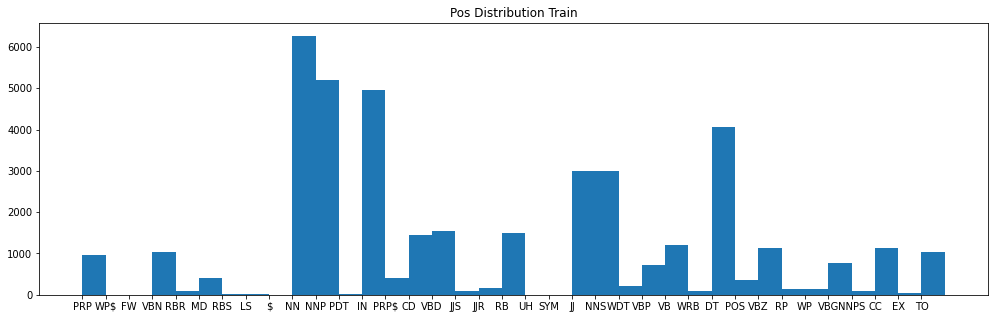

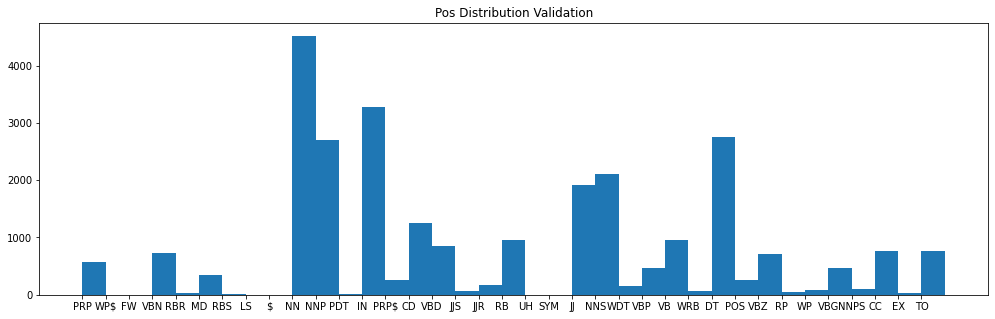

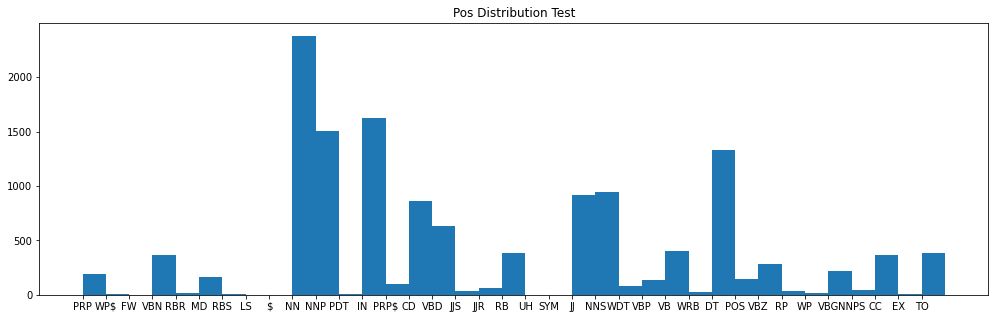

In [7]:
plt.figure(figsize=(17, 5))
plt.title("Pos Distribution Train")
plt.hist(set_pos, weights=conts_train, bins=np.linspace(0, len(set_pos), len(set_pos) + 1, dtype=np.int));
plt.show()
plt.figure(figsize=(17, 5))
plt.title("Pos Distribution Validation")
plt.hist(set_pos, weights=conts_val, bins=np.linspace(0, len(set_pos), len(set_pos) + 1, dtype=np.int));
plt.show()
plt.figure(figsize=(17, 5))
plt.title("Pos Distribution Test")
plt.hist(set_pos, weights=conts_test, bins=np.linspace(0, len(set_pos), len(set_pos) + 1, dtype=np.int));
plt.show()

## Create GloVe embeddings (keep attention to the size, maybe we have to change it)

In [8]:
def load_embedding_model(model_type: str,
                         embedding_dimension: int = 50) -> gensim.models.keyedvectors.KeyedVectors:
    """
    Loads a pre-trained word embedding model via gensim library.

    :param model_type: name of the word embedding model to load.
    :param embedding_dimension: size of the embedding space to consider

    :return
        - pre-trained word embedding model (gensim KeyedVectors object)
    """

    download_path = ""

    # Find the correct embedding model name
    if model_type.strip().lower() == 'word2vec':
        download_path = "word2vec-google-news-300"

    elif model_type.strip().lower() == 'glove':
        download_path = "glove-wiki-gigaword-{}".format(embedding_dimension)
    elif model_type.strip().lower() == 'fasttext':
        download_path = "fasttext-wiki-news-subwords-300"
    else:
        raise AttributeError("Unsupported embedding model type! Available ones: word2vec, glove, fasttext")

    # Check download
    try:
        emb_model = gloader.load(download_path)
    except ValueError as e:
        print("Invalid embedding model name! Check the embedding dimension:")
        print("Word2Vec: 300")
        print("Glove: 50, 100, 200, 300")
        raise e

    return emb_model

In [9]:
def check_OOV_terms(embedding_vocabulary: List[str],
                    word_listing: List[str]):
    """
    Checks differences between pre-trained embedding model vocabulary
    and dataset specific vocabulary in order to highlight out-of-vocabulary terms.

    :param embedding_vocabulary: pre-trained word embedding model vocab (list)
    :param word_listing: dataset specific vocabulary (list)

    :return
        - list of OOV terms
    """
    
    oov = set(word_listing).difference(embedding_vocabulary)
    return list(oov)

In [10]:
def build_embedding_matrix(embedding_model: gensim.models.keyedvectors.KeyedVectors,
                           embedding_dimension: int,
                           word_to_idx: Dict[str, int],
                           vocab_size: int,
                           oov_terms: List[str]) -> np.ndarray:
    """
    Builds the embedding matrix of a specific dataset given a pre-trained word embedding model

    :param embedding_model: pre-trained word embedding model (gensim wrapper)
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param vocab_size: size of the vocabulary
    :param oov_terms: list of OOV terms (list)

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)

    for word, idx in tqdm(word_to_idx.items()):
        try:
            embedding_vector = embedding_model[word]
        except (KeyError, TypeError):
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector

    return embedding_matrix


def update_embedding_matrix(embedding_model: np.ndarray, 
                            embedding_dimension: int,
                            word_to_idx: Dict[str, int],
                            vocab_size: int,
                            oov_terms: List[str]) -> np.ndarray:
    """
    Builds the embedding matrix of a specific dataset given a pre-trained emdedding matrix

    :param embedding_model: pre-trained embedding matrix
    :param word_to_idx: vocabulary map (word -> index) (dict)
    :param vocab_size: size of the vocabulary
    :param oov_terms: list of OOV terms (list)

    :return
        - embedding matrix that assigns a high dimensional vector to each word in the dataset specific vocabulary (shape |V| x d)
    """
    embedding_matrix = np.zeros((vocab_size, embedding_dimension), dtype=np.float32)

    for word, idx in tqdm(word_to_idx.items()):
        try:
            embedding_vector = embedding_model[idx]
        except (TypeError, IndexError):
            embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)

        embedding_matrix[idx] = embedding_vector

    return embedding_matrix


## Tokenizer

In [11]:
# Glove -> 50, 100, 200, 300

class KerasTokenizer(object):
    """
    A simple high-level wrapper for the Keras tokenizer.
    """

    def __init__(self, build_embedding_matrix=False, embedding_dimension=None,
                 embedding_model_type=None, tokenizer_args=None, embedding_model=None):
        if build_embedding_matrix:
            assert embedding_model_type is not None
            assert embedding_dimension is not None and type(embedding_dimension) == int

        self.build_embedding_matrix = build_embedding_matrix
        self.embedding_dimension = embedding_dimension
        self.embedding_model_type = embedding_model_type
        self.embedding_model = embedding_model
        self.embedding_matrix = None
        self.vocab = None

        tokenizer_args = {} if tokenizer_args is None else tokenizer_args
        assert isinstance(tokenizer_args, dict) or isinstance(tokenizer_args, collections.OrderedDict)

        self.tokenizer_args = tokenizer_args

    def build_vocab(self, data, **kwargs):
        print('Fitting tokenizer...')
        self.tokenizer = tf.keras.preprocessing.text.Tokenizer(**self.tokenizer_args)
        self.tokenizer.fit_on_texts(data)
        print('Fit completed!')

        self.vocab = self.tokenizer.word_index

        if self.build_embedding_matrix:
            if self.embedding_model is None:
              print('Loading embedding model! It may take a while...')
              self.embedding_model = load_embedding_model(model_type=self.embedding_model_type, 
                                                          embedding_dimension=self.embedding_dimension)
            
            print('Checking OOV terms in train...')
            self.oov_terms_train = check_OOV_terms(embedding_vocabulary=set(self.embedding_model.vocab.keys()),
                                             word_listing=list(self.vocab.keys()))
            
            print("Total OOV terms: {0} ({1:.2f}%)".format(len(self.oov_terms_train), 100*float(len(self.oov_terms_train)) / len(self.vocab)))

            print('Building the embedding matrix for train...')
            self.embedding_matrix = build_embedding_matrix(embedding_model=self.embedding_model,
                                                           word_to_idx=self.vocab,
                                                           vocab_size=len(self.vocab)+1,          
                                                           embedding_dimension=self.embedding_dimension,
                                                           oov_terms=self.oov_terms_train)
            print('Done for train!')

    def update_vocab(self, data, **kwargs):
      self.tokenizer.fit_on_texts(data)
      if self.build_embedding_matrix:
        old_vocab = self.vocab
        self.vocab = self.tokenizer.word_index
        print('Checking OOV terms...')
        self.oov_terms = check_OOV_terms(embedding_vocabulary=set(old_vocab.keys()), 
                                         word_listing=list(self.vocab.keys()))
        
        print("Total OOV terms: {0} ({1:.2f}%)".format(len(self.oov_terms), 100*float(len(self.oov_terms)) / len(self.vocab)))

        print('Building the embedding matrix...')
        self.embedding_matrix = update_embedding_matrix(embedding_model=self.embedding_matrix,
                                                       word_to_idx=self.vocab,
                                                       vocab_size=len(self.vocab)+1,          
                                                       embedding_dimension=self.embedding_dimension,
                                                       oov_terms=self.oov_terms)

    def get_info(self):
        return {
            'build_embedding_matrix': self.build_embedding_matrix,
            'embedding_dimension': self.embedding_dimension,
            'embedding_model_type': self.embedding_model_type,
            'embedding_matrix': self.embedding_matrix.shape if self.embedding_matrix is not None else self.embedding_matrix,
            'embedding_model': self.embedding_model,
            'vocab_size': len(self.vocab) + 1,
        }

    def tokenize(self, text):
        return text

    def convert_tokens_to_ids(self, tokens):
        if type(tokens) == str:
            return self.tokenizer.texts_to_sequences([tokens])[0]
        else:
            return self.tokenizer.texts_to_sequences(tokens)

    def convert_ids_to_tokens(self, ids):
        return self.tokenizer.sequences_to_texts(ids)

### Downloading embeddings

In [12]:
embedding_dimension = 50
embedding_model = load_embedding_model(model_type="glove", 
                                       embedding_dimension=embedding_dimension)

[==================================================] 100.0% 66.0/66.0MB downloaded


### Creating tokenizer

In [13]:
tokenizer_args = {
    'oov_token': "OOV_TOKEN",  # The vocabulary id for unknown terms during text conversion
    'lower' : True,  # default
    'filters' : '' 
}

tokenizer = KerasTokenizer(tokenizer_args=tokenizer_args,
                           build_embedding_matrix=True,
                           embedding_dimension=embedding_dimension,
                           embedding_model_type="glove", 
                           embedding_model=embedding_model)
tokenizer.build_vocab(dataframe_train["sentence"])

tokenizer_info = tokenizer.get_info()

print('Tokenizer info: ', tokenizer_info)

Fitting tokenizer...
Fit completed!
Checking OOV terms in train...
Total OOV terms: 310 (4.49%)
Building the embedding matrix for train...


100%|██████████| 6911/6911 [00:00<00:00, 252201.98it/s]

Done for train!
Tokenizer info:  {'build_embedding_matrix': True, 'embedding_dimension': 50, 'embedding_model_type': 'glove', 'embedding_matrix': (6912, 50), 'embedding_model': <gensim.models.keyedvectors.Word2VecKeyedVectors object at 0x7efb891f4c50>, 'vocab_size': 6912}


### Updating tokenizer with validation and test

In [14]:
tokenizer.update_vocab(dataframe_val["sentence"])
tokenizer.update_vocab(dataframe_test["sentence"])

Checking OOV terms...
Total OOV terms: 2210 (24.23%)
Building the embedding matrix...


100%|██████████| 9121/9121 [00:00<00:00, 286580.82it/s]


Checking OOV terms...
Total OOV terms: 833 (8.37%)
Building the embedding matrix...


100%|██████████| 9954/9954 [00:00<00:00, 474443.76it/s]


In [15]:
a = list(tokenizer.vocab.keys())
a.sort()
print(a)

['%', '&', "'d", "'ll", "'m", "'re", "'s", "'ve", '@', 'OOV_TOKEN', 'a', 'a-d', 'a.', 'a.c.', 'a.d.', 'a.l.', 'aba', 'abandon', 'abandoned', 'abating', 'abbey', 'abbot', 'abide', 'ability', 'able', 'aboard', 'abolishing', 'abortion', 'abortion-related', 'abortionist', 'abortions', 'abounding', 'about', 'above', 'above-market', 'abridging', 'abroad', 'abrupt', 'absolute', 'absolutely', 'absorbed', 'absurd', 'absurdity', 'abuse', 'abuzz', 'ac-number_tokenu', 'academic', 'academically', 'academics', 'acceded', 'accelerated', 'acceleration', 'accept', 'acceptance', 'acceptances', 'accepted', 'accepting', 'access', 'accessories', 'accident', 'accidentally', 'accidents', 'accommodate', 'accommodations', 'accompany', 'accomplishments', 'accord', 'accordance', 'according', 'account', 'accountability', 'accountant', 'accountants', 'accounted', 'accounting', 'accounts', 'accrue', 'accrued', 'accumulated', 'accurate', 'accurately', 'accused', 'accusing', 'aces', 'acetate', 'achieve', 'achieved', 

# Data Conversion

### One-Hot Encoders Wrapper definition

In [16]:
class OneHotEncoderWrapper(object):

  def __init__(self):
    self.label_encoder = LabelEncoder()

  def get_one_hot_encoding(self, list_pos):
    # create a dictionary containing pos and its one hot encoding
    ris = {}
    integer_encoded = self.label_encoder.fit_transform(list_pos)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    for i in range(len(list_pos)):
      ris[list_pos[i]] = onehot_encoded[i]
    return ris
  
  def get_inverse(self, encoded):
    # from one hot encoding to original pos
    return self.label_encoder.inverse_transform([np.argmax(encoded)])

  def get_pos_from_label(self, label):
    # from one hot encoding to original pos
    return self.label_encoder.inverse_transform([label])

### Padding for x and computation of max sequence length

In [17]:
def convert_text(df, tokenizer, is_training=False, max_seq_length=None):
    """
    Converts input text sequences using a given tokenizer

    :param texts: either a list or numpy ndarray of strings
    :tokenizer: an instantiated tokenizer
    :is_training: whether input texts are from the training split or not
    :max_seq_length: the max token sequence previously computed with
    training texts.

    :return
        text_ids: a nested list on token indices
        max_seq_length: the max token sequence previously computed with
        training texts.
    """

    text_ids = tokenizer.convert_tokens_to_ids(df['sentence'])

    # Padding
    if is_training:
        max_seq_length = int(np.quantile([len(seq) for seq in text_ids], 0.99))
    else:
        assert max_seq_length is not None

    text_ids = [seq + [0] * (max_seq_length - len(seq)) for seq in text_ids]
    text_ids = np.array([seq[:max_seq_length] for seq in text_ids])

    if is_training:
        return text_ids, max_seq_length
    else:
        return text_ids


x_train, max_seq_length = convert_text(dataframe_train, tokenizer, True)
print("Max token sequence: {}".format(max_seq_length))
print('X train shape: ', x_train.shape)

x_val = convert_text(dataframe_val, tokenizer, False, max_seq_length)
print('X val shape: ', x_val.shape)

x_test = convert_text(dataframe_test, tokenizer, False, max_seq_length)
print('X test shape: ', x_test.shape)

Max token sequence: 58
X train shape:  (1863, 58)
X val shape:  (1249, 58)
X test shape:  (603, 58)


### Padding y

In [18]:
Y_train_pos = [seq + ['PAD'] * (max_seq_length - len(seq)) if max_seq_length - len(seq)>0 else seq[:max_seq_length] for seq in dataframe_train['pos']]
Y_val_pos = [seq + ['PAD'] * (max_seq_length - len(seq)) if max_seq_length - len(seq)>0 else seq[:max_seq_length] for seq in dataframe_val['pos']]
Y_test_pos = [seq + ['PAD'] * (max_seq_length - len(seq)) if max_seq_length - len(seq)>0 else seq[:max_seq_length] for seq in dataframe_test['pos']]

### One-hot encoding of y

In [19]:
one_hot_encoder = OneHotEncoderWrapper()
ris = one_hot_encoder.get_one_hot_encoding(set_pos+['PAD'])
Y_train = [[ris[pos_hot] for pos_hot in sentence_pos] for sentence_pos in Y_train_pos]
Y_val = [[ris[pos_hot] for pos_hot in sentence_pos] for sentence_pos in Y_val_pos]
Y_test = [[ris[pos_hot] for pos_hot in sentence_pos] for sentence_pos in Y_test_pos]

Y_train = np.asarray(Y_train)
Y_val = np.asarray(Y_val)
Y_test = np.asarray(Y_test)

print("Y train shape: ", Y_train.shape)
print("Y val shape: ", Y_val.shape)
print("Y test shape: ", Y_test.shape)

Y train shape:  (1863, 58, 38)
Y val shape:  (1249, 58, 38)
Y test shape:  (603, 58, 38)


# Models

### Class Weights

In [20]:
weight_applied = True  # Whether or not to use sample_weights

In [21]:
def cont_pos(y_data):
  conts = {}
  for pos in set_pos + ['PAD']:
    conts[pos] = 0
  for row in y_data:
    for pos in set_pos + ['PAD']:
      for pos_2 in row:
        if pos==pos_2:
          conts[pos] +=1
  return conts

conts_train_pad = cont_pos(Y_train_pos)

class_weights = {}

if weight_applied:
  for pos in set_pos:
    class_weights[pos] = np.array(list(conts_train_pad.values())).sum() / (len(conts_train_pad)*conts_train_pad[pos])
else:
  for pos in set_pos:
    class_weights[pos] = 1.0
class_weights['PAD'] = 16.0
class_weights

{'$': 710.8815789473684,
 'CC': 2.518623840380402,
 'CD': 2.0109804213504057,
 'DT': 0.7022786652974744,
 'EX': 58.03114930182599,
 'FW': 1421.7631578947369,
 'IN': 0.5777176586325627,
 'JJ': 0.9570940140657939,
 'JJR': 18.11163258464633,
 'JJS': 30.907894736842106,
 'LS': 284.35263157894735,
 'MD': 6.918555512869766,
 'NN': 0.4580422544763972,
 'NNP': 0.5570080932006805,
 'NNPS': 30.575551782682513,
 'NNS': 0.9506941878266378,
 'PAD': 16.0,
 'PDT': 315.94736842105266,
 'POS': 7.811885482938115,
 'PRP': 2.993185595567867,
 'PRP$': 7.003759398496241,
 'RB': 1.9161228543055753,
 'RBR': 33.45325077399381,
 'RBS': 149.65927977839334,
 'RP': 20.310902255639096,
 'SYM': 2843.5263157894738,
 'TO': 2.7905066887040957,
 'UH': 2843.5263157894738,
 'VB': 2.3975769947634684,
 'VBD': 1.8500496524329693,
 'VBG': 3.7365654609585723,
 'VBN': 2.776881167763158,
 'VBP': 3.911315427495837,
 'VBZ': 2.5208566629339306,
 'WDT': 14.007518796992482,
 'WP': 20.166853303471445,
 'WP$': 473.92105263157896,
 'WRB

### Sample Weights

In [22]:
sample_weights_train = []
for sentence in range(len(x_train)):
  sample_weights_train.append([])
  for word in range(len(x_train[sentence])):
    if x_train[sentence][word] == 0:
      pos = 'PAD'
    else:
      pos = dataframe_train.iloc[sentence]['pos'][word]
    sample_weights_train[sentence].append(class_weights[pos])
sample_weights_train = np.asarray(sample_weights_train)
print("Sample weights train: ", sample_weights_train.shape)

sample_weights_val = []
for sentence in range(len(x_val)):
  sample_weights_val.append([])
  for word in range(len(x_val[sentence])):
    if x_val[sentence][word] == 0:
      pos = 'PAD'
    else:
      pos = dataframe_val.iloc[sentence]['pos'][word]
    sample_weights_val[sentence].append(class_weights[pos])
sample_weights_val = np.asarray(sample_weights_val)
print("Sample weights validation: ", sample_weights_val.shape)

sample_weights_test = []
for sentence in range(len(x_test)):
  sample_weights_test.append([])
  for word in range(len(x_test[sentence])):
    if x_test[sentence][word] == 0:
      pos = 'PAD'
    else:
      pos = dataframe_test.iloc[sentence]['pos'][word]
    sample_weights_test[sentence].append(class_weights[pos])
sample_weights_test = np.asarray(sample_weights_test)
print("Sample weights test: ", sample_weights_test.shape)

Sample weights train:  (1863, 58)
Sample weights validation:  (1249, 58)
Sample weights test:  (603, 58)


## Baseline

In [23]:
embedding_vector_length = embedding_dimension

def BaselineModel(embedding_vector_length):
  model_baseline = Sequential()
  model_baseline.add(Embedding(len(tokenizer.vocab.keys())+1, embedding_vector_length, 
                      input_length=max_seq_length, 
                      trainable=True))  # do not train embeddings
  model_baseline.add(Bidirectional(LSTM(max_seq_length, return_sequences=True)))
  model_baseline.add(TimeDistributed(Dense(len(set_pos)+1,  # +1 due to 'PAD'
                                  activation='softmax')))

  if weight_applied:
    model_baseline.compile(loss='categorical_crossentropy', optimizer='adam', 
                  weighted_metrics=['accuracy'], sample_weight_mode="temporal")
  else:
    model_baseline.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
  return model_baseline
  #print(model_baseline.summary())

### Training

In [25]:
model_baseline = BaselineModel(embedding_vector_length)
history = model_baseline.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), epochs=100, 
                    batch_size=64, sample_weight=sample_weights_train)

Epoch 1/100
30/30 [==============================] - 8s 143ms/step - loss: 22.1759 - accuracy: 0.8743 - val_loss: 7.0400 - val_accuracy: 0.9060
Epoch 2/100
30/30 [==============================] - 3s 101ms/step - loss: 5.8377 - accuracy: 0.9108 - val_loss: 5.4206 - val_accuracy: 0.9060
Epoch 3/100
30/30 [==============================] - 3s 102ms/step - loss: 4.8041 - accuracy: 0.9108 - val_loss: 4.8586 - val_accuracy: 0.9060
Epoch 4/100
30/30 [==============================] - 3s 100ms/step - loss: 4.2084 - accuracy: 0.9108 - val_loss: 4.5900 - val_accuracy: 0.9060
Epoch 5/100
30/30 [==============================] - 3s 99ms/step - loss: 3.9288 - accuracy: 0.9108 - val_loss: 4.3982 - val_accuracy: 0.9060
Epoch 6/100
30/30 [==============================] - 3s 100ms/step - loss: 3.7708 - accuracy: 0.9128 - val_loss: 4.3281 - val_accuracy: 0.9071
Epoch 7/100
30/30 [==============================] - 3s 102ms/step - loss: 3.6903 - accuracy: 0.9138 - val_loss: 4.2714 - val_accuracy: 0.9107

#### Plots

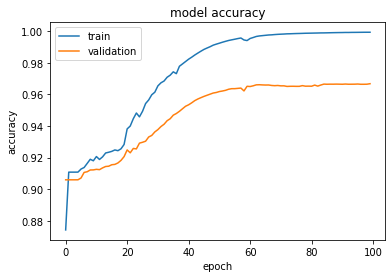

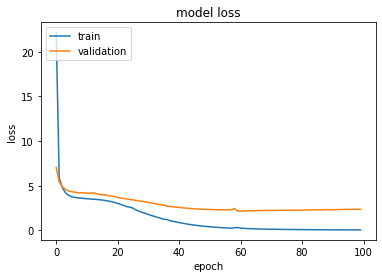

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## GRU

In [27]:
def GRUModel(embedding_vector_length):
  model_gru = Sequential()
  model_gru.add(Embedding(len(tokenizer.vocab.keys())+1, embedding_vector_length, 
                      input_length=max_seq_length, 
                      trainable=True))  # do not train embeddings
  model_gru.add(Bidirectional(GRU(max_seq_length, return_sequences=True)))
  model_gru.add(TimeDistributed(Dense(len(set_pos)+1,  # +1 due to 'PAD'
                                  activation='softmax')))

  if weight_applied:
    model_gru.compile(loss='categorical_crossentropy', optimizer='adam', 
                  weighted_metrics=['accuracy'], sample_weight_mode="temporal")
  else:
    model_gru.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
  #print(model_gru.summary())
  return model_gru

### Training

In [28]:
model_gru = GRUModel(embedding_vector_length)
history = model_gru.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), epochs=100, 
                    batch_size=64, sample_weight=sample_weights_train)

Epoch 1/100
30/30 [==============================] - 8s 135ms/step - loss: 26.1102 - accuracy: 0.8505 - val_loss: 5.8975 - val_accuracy: 0.9060
Epoch 2/100
30/30 [==============================] - 3s 98ms/step - loss: 4.6915 - accuracy: 0.9108 - val_loss: 4.1954 - val_accuracy: 0.9060
Epoch 3/100
30/30 [==============================] - 3s 96ms/step - loss: 3.7812 - accuracy: 0.9115 - val_loss: 3.9493 - val_accuracy: 0.9070
Epoch 4/100
30/30 [==============================] - 3s 97ms/step - loss: 3.6297 - accuracy: 0.9147 - val_loss: 3.8703 - val_accuracy: 0.9106
Epoch 5/100
30/30 [==============================] - 3s 96ms/step - loss: 3.5641 - accuracy: 0.9262 - val_loss: 3.8233 - val_accuracy: 0.9175
Epoch 6/100
30/30 [==============================] - 3s 96ms/step - loss: 3.5110 - accuracy: 0.9380 - val_loss: 3.7821 - val_accuracy: 0.9240
Epoch 7/100
30/30 [==============================] - 3s 97ms/step - loss: 3.4597 - accuracy: 0.9408 - val_loss: 3.7388 - val_accuracy: 0.9276
Epoc

#### Plots

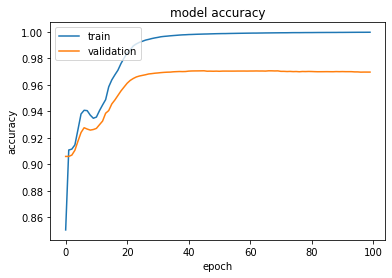

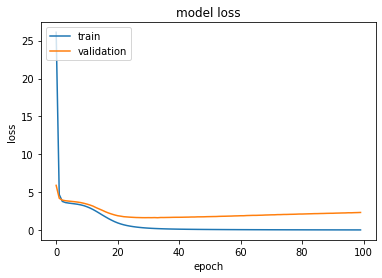

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 2 LSTM

In [30]:
def LSTMModel(embedding_vector_length):
  model_2_LSTM = Sequential()
  model_2_LSTM.add(Embedding(len(tokenizer.vocab.keys())+1, embedding_vector_length, 
                      input_length=max_seq_length, 
                      trainable=True))  # do not train embeddings
  model_2_LSTM.add(Bidirectional(LSTM(max_seq_length, return_sequences=True)))
  model_2_LSTM.add(Bidirectional(LSTM(max_seq_length, return_sequences=True)))
  model_2_LSTM.add(TimeDistributed(Dense(len(set_pos)+1,  # +1 due to 'PAD'
                                  activation='softmax')))

  if weight_applied:
    model_2_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', 
                  weighted_metrics=['accuracy'], sample_weight_mode="temporal")
  else:
    model_2_LSTM.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
  #print(model_2_LSTM.summary())
  return model_2_LSTM

### Training

In [31]:
model_2_LSTM = LSTMModel(embedding_vector_length)
history = model_2_LSTM.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), epochs=100, 
                    batch_size=64, sample_weight=sample_weights_train)

Epoch 1/100
30/30 [==============================] - 15s 268ms/step - loss: 17.2170 - accuracy: 0.8793 - val_loss: 6.4881 - val_accuracy: 0.9060
Epoch 2/100
30/30 [==============================] - 6s 199ms/step - loss: 5.0623 - accuracy: 0.9108 - val_loss: 4.5589 - val_accuracy: 0.9060
Epoch 3/100
30/30 [==============================] - 6s 201ms/step - loss: 3.8974 - accuracy: 0.9126 - val_loss: 4.0940 - val_accuracy: 0.9070
Epoch 4/100
30/30 [==============================] - 6s 202ms/step - loss: 3.7020 - accuracy: 0.9136 - val_loss: 3.9931 - val_accuracy: 0.9089
Epoch 5/100
30/30 [==============================] - 6s 203ms/step - loss: 3.6330 - accuracy: 0.9152 - val_loss: 3.9028 - val_accuracy: 0.9078
Epoch 6/100
30/30 [==============================] - 6s 205ms/step - loss: 3.5851 - accuracy: 0.9129 - val_loss: 3.8892 - val_accuracy: 0.9082
Epoch 7/100
30/30 [==============================] - 6s 203ms/step - loss: 3.5440 - accuracy: 0.9193 - val_loss: 3.8816 - val_accuracy: 0.90

#### Plots

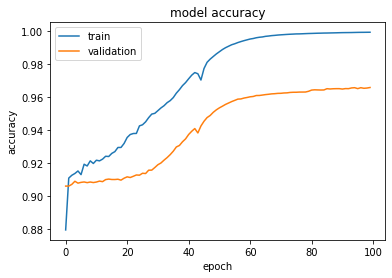

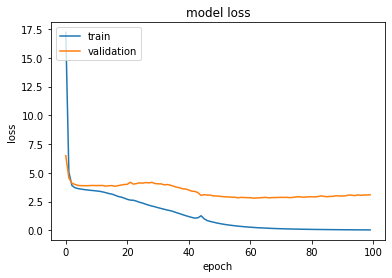

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## 2 Dense

In [33]:
def DenseModel(embedding_vector_length, hidden_units):
  model_2_dense = Sequential()
  model_2_dense.add(Embedding(len(tokenizer.vocab.keys())+1, embedding_vector_length, 
                      input_length=max_seq_length, 
                      trainable=True))  # do not train embeddings
  model_2_dense.add(Bidirectional(LSTM(max_seq_length, return_sequences=True)))
  model_2_dense.add(TimeDistributed(Dense(hidden_units, activation='relu')))
  model_2_dense.add(TimeDistributed(Dense(len(set_pos)+1,  # +1 due to 'PAD'
                                  activation='softmax')))

  if weight_applied:
    model_2_dense.compile(loss='categorical_crossentropy', optimizer='adam', 
                  weighted_metrics=['accuracy'], sample_weight_mode="temporal")
  else:
    model_2_dense.compile(loss='categorical_crossentropy', optimizer='adam', 
                  metrics=['accuracy'])
  
  #print(model_2_dense.summary())
  return model_2_dense

### Training

In [34]:
model_2_dense = DenseModel(embedding_vector_length, max_seq_length)
history = model_2_dense.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), epochs=100, 
                    batch_size=64, sample_weight=sample_weights_train)

Epoch 1/100
30/30 [==============================] - 9s 145ms/step - loss: 23.2874 - accuracy: 0.8784 - val_loss: 7.6287 - val_accuracy: 0.9060
Epoch 2/100
30/30 [==============================] - 3s 105ms/step - loss: 5.5804 - accuracy: 0.9108 - val_loss: 4.8229 - val_accuracy: 0.9060
Epoch 3/100
30/30 [==============================] - 3s 105ms/step - loss: 4.2541 - accuracy: 0.9108 - val_loss: 4.3376 - val_accuracy: 0.9060
Epoch 4/100
30/30 [==============================] - 3s 103ms/step - loss: 3.8320 - accuracy: 0.9113 - val_loss: 4.1523 - val_accuracy: 0.9067
Epoch 5/100
30/30 [==============================] - 3s 105ms/step - loss: 3.7084 - accuracy: 0.9128 - val_loss: 4.0722 - val_accuracy: 0.9087
Epoch 6/100
30/30 [==============================] - 3s 105ms/step - loss: 3.6366 - accuracy: 0.9157 - val_loss: 3.9906 - val_accuracy: 0.9081
Epoch 7/100
30/30 [==============================] - 3s 105ms/step - loss: 3.5779 - accuracy: 0.9150 - val_loss: 3.9648 - val_accuracy: 0.908

#### Plots

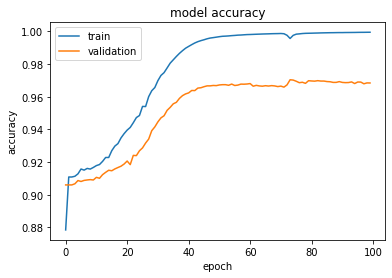

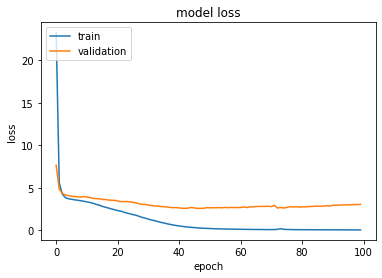

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Grid-search

In [36]:
models = {'2_dense': DenseModel, "baseline": BaselineModel}
parameters = {'baseline': {'epochs': [1, 1, 1], 'batch_size':[16]},
              '2_dense': {'hidden_units': [32],'epochs': [1, 1, 1], 'batch_size':[16]}
              }
best_scores = {1: 0, 2: 0}
best_models = {1: None, 2: None}

for model_name in models.keys():
  print("Model: ", model_name)
  if model_name == '2_dense':
    for hidden_units in parameters[model_name]['hidden_units']:
      print("Hidden units: ", hidden_units)
      model = models[model_name](embedding_vector_length, hidden_units)
      for epochs in parameters[model_name]['epochs']:
        print("\tEpochs: ", epochs)
        for batch_size in parameters[model_name]['batch_size']:
          print("\tBatch Size",batch_size)
          model.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), 
                    epochs=epochs, batch_size=batch_size, 
                    sample_weight=sample_weights_train)
          
          scores = evaluate_f1(model, x_val, Y_val)
          if scores['f1-score'] > best_scores[2]:
            if scores['f1-score'] > best_scores[1]:
              best_scores[2] = best_scores[1]
              best_scores[1] = scores['f1-score']
              best_models[2] = best_models[1]
              best_models[1] = copy.deepcopy(model)
            else:
              best_scores[2] = scores['f1-score']
              best_models[2] = copy.deepcopy(model)

  else:
    model = models[model_name](embedding_vector_length)
    for epochs in parameters[model_name]['epochs']:
      print("\tEpochs: ", epochs)
      for batch_size in parameters[model_name]['batch_size']:
        print("\tBatch Size",batch_size)
        model.fit(x_train, Y_train, validation_data=(x_val, Y_val, sample_weights_val), 
                  epochs=epochs, batch_size=batch_size, 
                  sample_weight=sample_weights_train)
        scores = evaluate_f1(model, x_val, Y_val)
        if scores['f1-score'] > best_scores[2]:
          if scores['f1-score'] > best_scores[1]:
            best_scores[2] = best_scores[1]
            best_scores[1] = scores['f1-score']
            best_models[2] = best_models[1]
            best_models[1] = copy.deepcopy(model)
          else:
            best_scores[2] = scores['f1-score']
            best_models[2] = copy.deepcopy(model)


Model:  2_dense
Hidden units:  32
	Epochs:  1
	Batch Size 16
117/117 [==============================] - 12s 70ms/step - loss: 10.5349 - accuracy: 0.8942 - val_loss: 4.6069 - val_accuracy: 0.9060


NameError: ignored

# Evaluate models

In [38]:
def evaluate_predictions(predictions: np.ndarray,
                         y: np.ndarray,
                         metrics: List[Callable],
                         metric_names: List[str]):
    """
    Evaluates given model predictions on a list of metric functions

    :param predictions: model predictions in np.ndarray format
    :param y: ground-truth labels in np.ndarray format
    :param metrics: list of metric functions
    :param metric_names: list of metric names

    :return
        metric_info: dictionary containing metric values for each input metric
    """

    assert len(metrics) == len(metric_names)

    print("Evaluating predictions! Total samples: ", y.shape[0])

    metric_info = {}

    for i, metric in enumerate(metrics):
        metric_name = metric_names[i]
        metric_value = metric(y_pred=predictions, y_true=y)
        metric_info[metric_name] = metric_value

    return metric_info

In [40]:
def evaluate_f1(model, x_data, y_data):
  test_predictions = model.predict(x_data)
  test_predictions = np.argmax(test_predictions, axis=-1)

  # Flatten
  predictions = [item for sublist in test_predictions for item in sublist]
  y = [item for sublist in np.argmax(y_data, axis=-1) for item in sublist]

  # Removing 'PAD'
  #y_new = []
  #predictions_new = []
  #for i in range(len(y)):
  #  if one_hot_encoder.get_pos_from_label(y[i]) != 'PAD':
  #    predictions_new.append(predictions[i])
  #    y_new.append(y[i])

  metrics = [
             accuracy_score,
             partial(f1_score, pos_label=1, average='macro')
             ]
  metric_names = [
      "accuracy",
      "f1-score"
  ]
  metric_info = evaluate_predictions(predictions=np.array(predictions),
                                    y=np.array(y),
                                    metrics=metrics,
                                    metric_names=metric_names)

  #print('Metrics info: \n{}'.format(metric_info))
  return metric_info

In [41]:
evaluate_f1(model_baseline, x_test, Y_test)
#evaluate_f1(model_gru, x_test, Y_test)
#evaluate_f1(model_2_LSTM, x_test, Y_test)
#evaluate_f1(model_2_dense, x_test, Y_test)

#from sklearn.metrics import classification_report
#report = classification_report(np.array(y_new), np.array(predictions_new), 
#                               target_names=[one_hot_encoder.get_pos_from_label(i)[0] for i in range(len(set_pos))]);
#print(report)

Evaluating predictions! Total samples:  34974


{'accuracy': 0.9446160004574827, 'f1-score': 0.7086106180740873}

# Test

In [ ]:
best_model = best_models[1]

In [ ]:
best_model.evaluate(x_test, Y_test, batch_size=128, sample_weight=sample_weights_test)

# Result Visualization

In [ ]:
id = 1
prediction = best_model.predict(x_test[id].reshape(-1, 58))  # Add batch dimension
prediction.shape

In [ ]:
for word in tokenizer.convert_ids_to_tokens([x_test[id]]):
  print(word)
for i, preds_pos in enumerate(prediction[0]):  # Remove batch dimension
  pos = one_hot_encoder.get_pos_from_label(np.argmax(preds_pos))
  true_pos = one_hot_encoder.get_pos_from_label(np.argmax(Y_test[id][i]))
  if true_pos != 'PAD':
    print(pos, true_pos)